# Tensorflow - Models

In [95]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Install pillow package to use tf.keras.preprocessing.image.load_img() and plt.imshow() functions.

```bash
pip install Pillow Pillow-PIL
```

In [61]:
# Supported models.
print('\n'.join([model for model in tf.keras.applications.__dict__.keys() if not str.startswith(model, '_')]))

densenet
inception_resnet_v2
inception_v3
mobilenet
mobilenet_v2
nasnet
resnet50
vgg16
vgg19
xception
DenseNet121
DenseNet169
DenseNet201
InceptionResNetV2
InceptionV3
MobileNet
MobileNetV2
NASNetLarge
NASNetMobile
ResNet50
VGG16
VGG19
Xception


## Sample image and labels

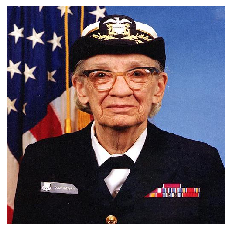

In [79]:
# Prepare sample image.
example_url = "https://storage.googleapis.com/download.tensorflow.org/"
temp_file = tf.keras.utils.get_file(
    "grace_hopper.jpg",
    example_url + "example_images/grace_hopper.jpg")

image = tf.keras.preprocessing.image.load_img(temp_file, target_size=[224, 224])
plt.axis('off')
_ = plt.imshow(image)

In [69]:
# Read labels.
# tf.keras.applications.vgg19.decode_predictions
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    example_url + 'data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
print(len(imagenet_labels))
print(imagenet_labels[:10], '...')

1001
['background' 'tench' 'goldfish' 'great white shark' 'tiger shark'
 'hammerhead' 'electric ray' 'stingray' 'cock' 'hen'] ...


## MobileNet
![](../images/MobileNet.png)

In [77]:
# Get model.
mobilenet_model = tf.keras.applications.MobileNet()
# mobilenet_model.summary()
print('# of layers =', len(pretrained_model.layers))

# of layers = 93


In [89]:
x = tf.keras.preprocessing.image.img_to_array(image)
print(x.shape)
print(x[:2, :2, :])
x = tf.keras.applications.mobilenet.preprocess_input(x[tf.newaxis, ...])
print(x.shape)
print(x[:1, :2, :2, :])

(224, 224, 3)
[[[25. 28. 83.]
  [30. 32. 93.]]

 [[25. 28. 83.]
  [24. 26. 87.]]]
(1, 224, 224, 3)
[[[[-0.8039216  -0.78039217 -0.3490196 ]
   [-0.7647059  -0.7490196  -0.27058822]]

  [[-0.8039216  -0.78039217 -0.3490196 ]
   [-0.8117647  -0.79607844 -0.31764704]]]]


In [68]:
# Predict sample image x.
result = mobilenet_model.predict(x)
print(result.shape)
index = np.argsort(result)[0, ::-1][:5] + 1
scores = np.sort(result)[0, ::-1][:5]  # 0 means first sample, -1 means reverse order, :5 means top-5 only.
labels = imagenet_labels[index]

print("Top-5 results:\n", list(zip(index, labels, scores)))

(1, 1000)
Top-5 results:
 [(653, 'military uniform', 0.7012437), (458, 'bow tie', 0.1869021), (835, 'suit', 0.026837973), (440, 'bearskin', 0.021798026), (716, 'pickelhaube', 0.008993522)]


## VGG19

![](../images/VGG19.jpg)

In [78]:
# Get model.
vgg19_model = tf.keras.applications.VGG19()
# vgg19_model.summary()
print('# of layers =', len(vgg19_model.layers))

574717952/574710816 [==============================] - 493s 1us/step
# of layers = 26


In [94]:
x = tf.keras.preprocessing.image.img_to_array(image)
print(x.shape)
print(x[:2, :2, :])
x = x[tf.newaxis, ...]
print(x.shape)
print(x[:1, :2, :2, :])

(224, 224, 3)
[[[25. 28. 83.]
  [30. 32. 93.]]

 [[25. 28. 83.]
  [24. 26. 87.]]]
(1, 224, 224, 3)
[[[[25. 28. 83.]
   [30. 32. 93.]]

  [[25. 28. 83.]
   [24. 26. 87.]]]]


In [95]:
# Predict sample image x.
result = vgg19_model.predict(x)
print(result.shape)
index = np.argsort(result)[0, ::-1][:5] + 1
scores = np.sort(result)[0, ::-1][:5]  # 0 means first sample, -1 means reverse order, :5 means top-5 only.
labels = imagenet_labels[index]

print("Top-5 results:\n", list(zip(index, labels, scores)))

(1, 1000)
Top-5 results:
 [(458, 'bow tie', 0.66947806), (653, 'military uniform', 0.2528752), (835, 'suit', 0.009486025), (907, 'Windsor tie', 0.007221469), (668, 'mortarboard', 0.006729506)]


## ResNet50
![](../images/ResNet50.png)

In [96]:
# Get model.
resnet50_model = tf.keras.applications.ResNet50()
# resnet50_model.summary()
print('# of layers =', len(resnet50_model.layers))

102858752/102853048 [==============================] - 68s 1us/step
# of layers = 177


In [100]:
x = tf.keras.preprocessing.image.img_to_array(image)
print(x.shape)
print(x[:2, :2, :])
x = x[tf.newaxis, ...]
print(x.shape)
print(x[:1, :2, :2, :])

(224, 224, 3)
[[[25. 28. 83.]
  [30. 32. 93.]]

 [[25. 28. 83.]
  [24. 26. 87.]]]
(1, 224, 224, 3)
[[[[25. 28. 83.]
   [30. 32. 93.]]

  [[25. 28. 83.]
   [24. 26. 87.]]]]


In [101]:
# Predict sample image x.
result = resnet50_model.predict(x)
print(result.shape)
index = np.argsort(result)[0, ::-1][:5] + 1
scores = np.sort(result)[0, ::-1][:5]  # 0 means first sample, -1 means reverse order, :5 means top-5 only.
labels = imagenet_labels[index]

print("Top-5 results:\n", list(zip(index, labels, scores)))

(1, 1000)
Top-5 results:
 [(458, 'bow tie', 0.9737766), (907, 'Windsor tie', 0.016026882), (466, 'bulletproof vest', 0.0023439405), (835, 'suit', 0.0016928365), (668, 'mortarboard', 0.0009030346)]


## ssd_mobilenet_v1_coco

In [3]:
# Download model file.
ssd_mobilenet_v1_coco_zip_path = tf.keras.utils.get_file(
    'ssd_mobilenet_v1_coco_2018_01_28.tar.gz',
    'http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2018_01_28.tar.gz')

76546048/76541073 [==============================] - 9s 0us/step


In [5]:
# Unzip model file into current folder.
import tarfile, zipfile
with tarfile.open(ssd_mobilenet_v1_coco_zip_path, 'r:gz') as file:
    file.extractall()

In [9]:
# Download label file.
mscoco_label_map_path = tf.keras.utils.get_file(
    'mscoco_label_map.pbtxt',
    'https://github.com/tensorflow/models/raw/master/research/object_detection/data/mscoco_label_map.pbtxt')

8192/5056 [================================================] - 0s 0us/step


In [139]:
with open(mscoco_label_map_path) as label_file:
    labels = label_file.read()
print(labels[:200])

item {
  name: "/m/01g317"
  id: 1
  display_name: "person"
}
item {
  name: "/m/0199g"
  id: 2
  display_name: "bicycle"
}
item {
  name: "/m/0k4j"
  id: 3
  display_name: "car"
}
item {
  name: "/m/


In [143]:
def read_mscoco_label(file_path):
    id = 0
    label_dict = {}

    with open(file_path) as label_file:
        texts = label_file.read()

    for line in texts.split('\n'):
        field = line.split(': ')
        if len(field) != 2:
            continue
        if field[0].strip() == 'id':
            id = int(field[1])
        elif field[0].strip() == 'display_name':
            label_dict[id] = field[1].strip('"')

    return label_dict

In [147]:
mscoco_label_dict = read_mscoco_label(mscoco_label_map_path)
print(len(mscoco_label_dict))

80


 114688/Unknown - 0s 0us/step

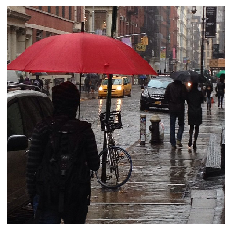

In [135]:
# Download sample image.
coco_image_path = tf.keras.utils.get_file(
    "coco_image.jpg",
    "http://farm8.staticflickr.com/7204/6982099079_d152fb67b1_z.jpg")

image = tf.keras.preprocessing.image.load_img(coco_image_path, target_size=[224, 224])
plt.axis('off')
_ = plt.imshow(image)

In [136]:
# Prepare image.
x = tf.keras.preprocessing.image.img_to_array(image)[tf.newaxis, ...].astype(np.uint8)
print(x.shape)
print(x[:2, :2, :])

(1, 224, 224, 3)
[[[[186 172 161]
   [178 164 151]
   [150 134 119]
   ...
   [143 143 143]
   [127 127 127]
   [ 91  86  90]]

  [[168 156 144]
   [208 194 181]
   [188 175 159]
   ...
   [142 140 141]
   [122 120 121]
   [ 95  91  92]]]]


In [10]:
# Restore model.
detection_graph = tf.Graph()

with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    
    with tf.gfile.GFile('./ssd_mobilenet_v1_coco_2018_01_28/frozen_inference_graph.pb', 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [22]:
def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[1], image.shape[2])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: image})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.int64)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

In [137]:
result = run_inference_for_single_image(x, detection_graph)
num_detections = result['num_detections']
print(num_detections)
print(result['detection_boxes'][:num_detections])
print(result['detection_scores'][:num_detections])
print(result['detection_classes'][:num_detections])

7
[[0.55930686 0.40820166 0.8328117  0.57421416]
 [0.31220037 0.7208293  0.6475623  0.8357647 ]
 [0.3283674  0.08379996 0.99896556 0.43977273]
 [0.10217233 0.02638942 0.3205971  0.68142056]
 [0.31685448 0.80890054 0.6544299  0.9187587 ]
 [0.32086894 0.9557562  0.4674972  0.9916067 ]
 [0.34375036 0.9104266  0.46436173 0.9438181 ]]
[0.8195047  0.7635247  0.75916505 0.678111   0.66991496 0.6027292
 0.32027516]
[ 2  1  1 28  1  1  1]


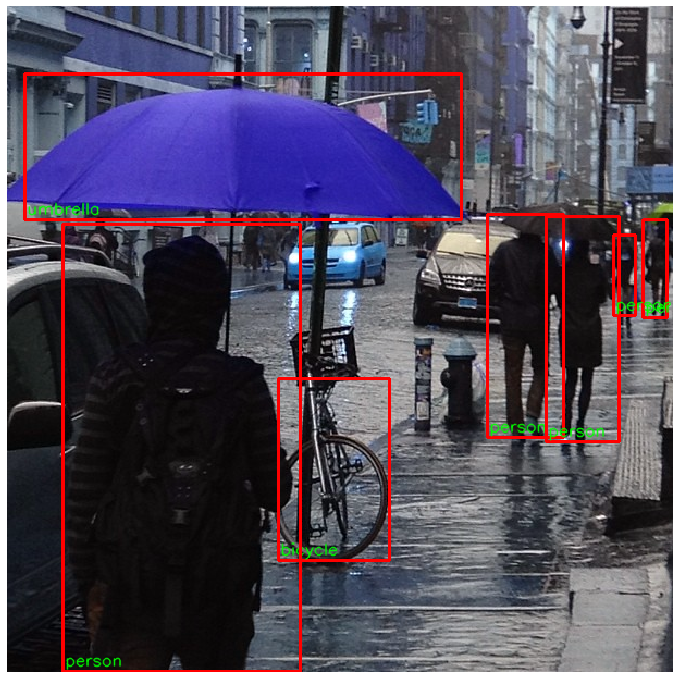

In [167]:
# Show results.
coco_image = cv2.imread(coco_image_path)
height, width, _ = coco_image.shape

font = cv2.FONT_HERSHEY_SIMPLEX

for index in range(num_detections):
    top, left, bottom, right = result['detection_boxes'][index]
    class_index = result['detection_classes'][index]
    left, top, right, bottom = int(left * width), int(top * height), int(right * width), int(bottom * height)
    cv2.rectangle(coco_image, (left, top), (right, bottom), (255,0,0), 2)
    cv2.putText(coco_image, mscoco_label_dict[class_index], (left + 2, bottom - 5), font, 0.5, (0,255,0), 1, cv2.LINE_AA)
plt.figure(figsize=(width * 0.02, height * 0.02))
plt.axis('off')
_ = plt.imshow(coco_image)

## Reference
- https://github.com/tensorflow/models
- https://www.tensorflow.org/beta/guide/saved_model
- https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md
- https://arxiv.org/abs/1704.04861
- https://modelzoo.co/framework/tensorflow
- http://cocodataset.org